<a href="https://colab.research.google.com/github/bhumiti28/Object-Detection/blob/main/Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8 : Object Detection using Transfer Learning

## Faster RCNN

## Setting Path and Import Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/'

/content/drive/.shortcut-targets-by-id/1u-lFhUFcDGRMbgvYT4MRgV63q8gzBkHJ/BitCoders/Assignment8/TensorFlow


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 1227, done.
remote: Counting objects: 100% (1227/1227), done.
remote: Compressing objects: 100% (691/691), done.
remote: Total 55899 (delta 739), reused 965 (delta 522), pack-reused 54672
Receiving objects: 100% (55899/55899), 572.31 MiB | 17.39 MiB/s, done.
Resolving deltas: 100% (38348/38348), done.
Checking out files: 100% (2394/2394), done.


In [ ]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,907 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [ ]:
!pip install tf_slim

In [ ]:
%cd '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/models/research'

/content/drive/.shortcut-targets-by-id/1u-lFhUFcDGRMbgvYT4MRgV63q8gzBkHJ/BitCoders/Assignment8/TensorFlow/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
import os
import sys

os.environ['PYTHONPATH']+=":/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/models"

sys.path.append("/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/models/research")

In [ ]:
cp '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/models/research/object_detection/packages/tf2/setup.py' .


In [ ]:
!python setup.py build
!python setup.py install

running build
running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/requires.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/top_level.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
zip_safe flag not s

In [ ]:
%cd '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/models/research/object_detection/builders/'

/content/drive/.shortcut-targets-by-id/1u-lFhUFcDGRMbgvYT4MRgV63q8gzBkHJ/BitCoders/Assignment8/TensorFlow/models/research/object_detection/builders


In [ ]:
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

In [ ]:
%cd '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/scripts/'

/content/drive/.shortcut-targets-by-id/1u-lFhUFcDGRMbgvYT4MRgV63q8gzBkHJ/BitCoders/Assignment8/TensorFlow/Project/scripts


## Spliting Dataset into Test and Train

In [ ]:
!python3 partition_dataset.py -x -i /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images -r 0.1

In [ ]:
!python3 generate_tfrecord.py -x /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/train -l /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/label_map.pbtxt -o /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/train.record -c /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/train.csv

Successfully created the TFRecord file: /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/train.record
Successfully created the CSV file: /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/train.csv


In [ ]:
!python3 generate_tfrecord.py -x /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test -l /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/label_map.pbtxt -o /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/test.record -c /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/test.csv

Successfully created the TFRecord file: /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/test.record
Successfully created the CSV file: /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/test.csv


## Training 

In [ ]:
!python model_main_tf2.py --model_dir='/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/models/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8' --pipeline_config_path='/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/models/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config'

2021-04-12 14:34:30.894419: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-12 14:34:35.100591: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-12 14:34:35.101623: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-12 14:34:35.124224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-12 14:34:35.125062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-04-12 14:34:35.125111: I tensorflow/stream_executor/platform/default/dso_lo

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/models/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/models/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config --output_directory /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/exported-models/mymodels

2021-04-12 16:36:05.792593: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-12 16:36:10.160866: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-12 16:36:10.163841: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-12 16:36:10.194398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-12 16:36:10.195192: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-04-12 16:36:10.195240: I tensorflow/stream_executor/platform/default/dso_lo

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/models/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/models/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/ --output_directory /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/exported-models/my_model

2021-04-12 16:41:39.804488: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-12 16:41:43.735502: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-12 16:41:43.736622: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-12 16:41:43.762149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-12 16:41:43.762976: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-04-12 16:41:43.763025: I tensorflow/stream_executor/platform/default/dso_lo

## Testing

In [ ]:
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/exported-models/my_model/saved_model"
print('Loading model...', end='')# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('awwwww!')

Loading model...awwwww!


In [ ]:
category_index=label_map_util.create_category_index_from_labelmap("/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/annotations/label_map.pbtxt",use_display_name=True)

In [ ]:
img=['/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/08818cdfd42b665a.jpg', '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/001a7118d6df8b18.jpg','/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/00019bc020b24b32.jpg','/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/3018a239d33dc417.jpg']
print(img)

['/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/08818cdfd42b665a.jpg', '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/001a7118d6df8b18.jpg', '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/00019bc020b24b32.jpg', '/content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/3018a239d33dc417.jpg']


Running inference for /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/08818cdfd42b665a.jpg... Done


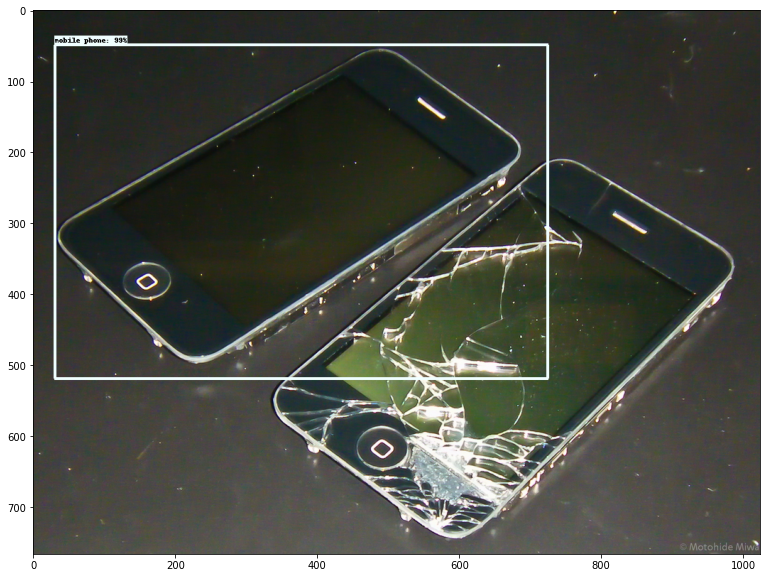

Running inference for /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/001a7118d6df8b18.jpg... Done


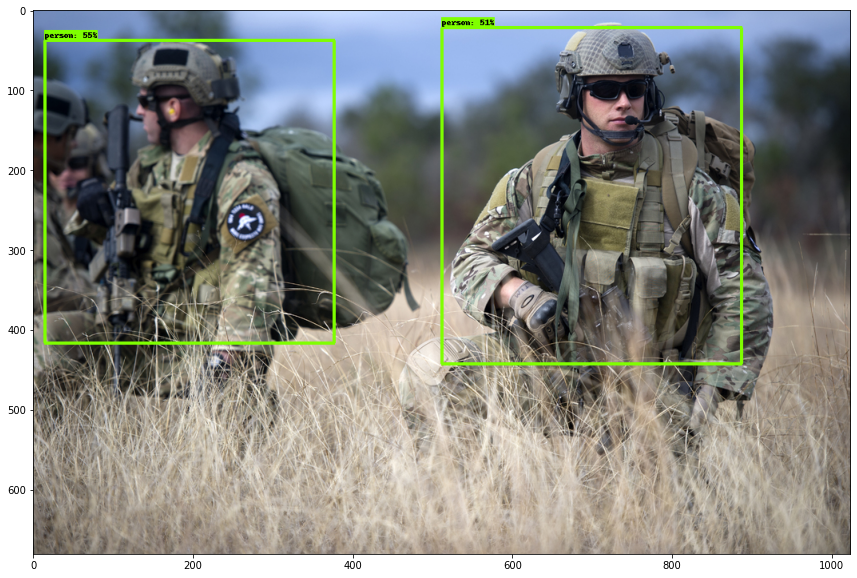

Running inference for /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/00019bc020b24b32.jpg... Done


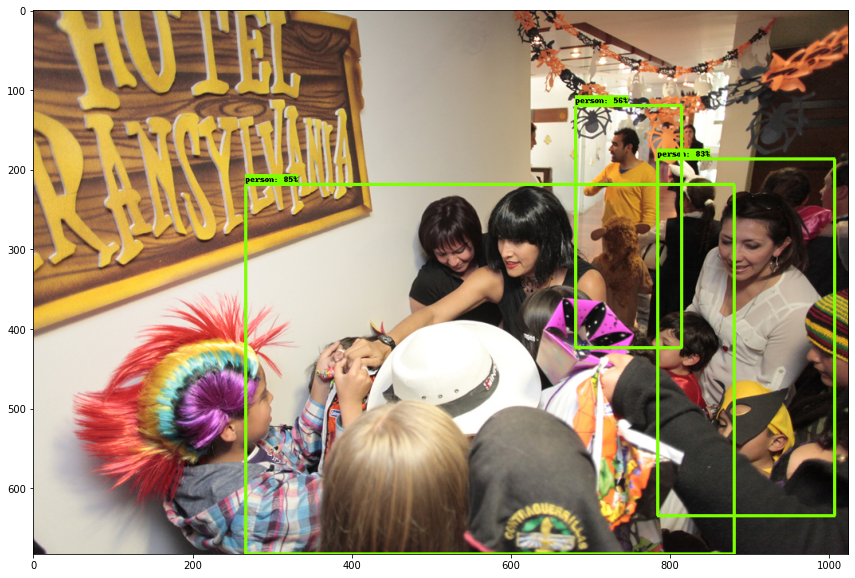

Running inference for /content/drive/MyDrive/BitCoders/Assignment8/TensorFlow/Project/images/test/3018a239d33dc417.jpg... Done


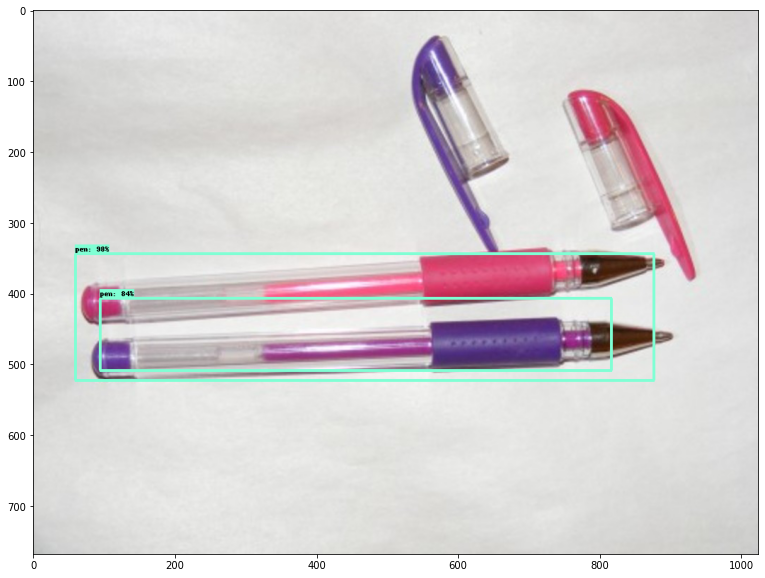

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

for image_path in img:
    
    print('Running inference for {}... '.format(image_path), end='')
    
    image_np=load_image_into_numpy_array(image_path)

    input_tensor=tf.convert_to_tensor(image_np)
    input_tensor=input_tensor[tf.newaxis, ...]
    detections=detect_fn(input_tensor)
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections
    detections['detection_classes']=detections['detection_classes'].astype(np.int64)
    image_np_with_detections=image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,     
          min_score_thresh=.5,      
          agnostic_mode=False)
    
    %matplotlib inline
    plt.figure(figsize=(20,10))
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()